# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas auxiliares
import os
from functools import reduce
import re

#Biblioteca para plot de gráficos
import plotnine as gg
import matplotlib.pyplot as plt

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

matplotlib: 3.3.3
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas    : 1.3.2
json      : 2.0.9
plotnine  : 0.7.1
re        : 2.2.1
numpy     : 1.19.5



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## SEADE
fonte: https://www.seade.gov.br/coronavirus/

In [3]:
casos_obitos_doencas_preexistentes = pyarrow_read_csv(path_data+"SEADE/casos_obitos_doencas_preexistentes.csv",sep=";")

In [4]:
casos_ = casos_obitos_doencas_preexistentes.copy()

___

# Analisando as bases de dados

In [5]:
describe(casos_obitos_doencas_preexistentes)

Quantidade de linhas: 2856225


variable     type     na na_pct  unique      min  \
0                nome_munic   object      0   0.0%     646        -   
1               codigo_ibge    int64      0   0.0%     646  3500105   
2                     idade  float64   6317  0.22%     121      0.0   
3                   cs_sexo   object      0   0.0%       5        -   
4       diagnostico_covid19   object      0   0.0%       1        -   
5      data_inicio_sintomas   object  34679  1.21%     448        -   
6                     obito    int64      0   0.0%       2        0   
7                      asma   object      0   0.0%       3        -   
8               cardiopatia   object      0   0.0%       3        -   
9                  diabetes   object      0   0.0%       3        -   
10      doenca_hematologica   object      0   0.0%       3        -   
11          doenca_hepatica   object      0   0.0%       3        -   
12       doenca_neurologica   object      0   0.0%       3        -   
13             doenca_renal   object      0   0.0%       3        -   
14           imunodepressao   object      0   0.0%       3        -   
15                obesidade   object      0   0.0%       3        -   
16  outros_fatores_de_risco   object      0   0.0%       3        -   
17              pneumopatia   object      0   0.0%       3        -   
18                 puerpera   object      0   0.0%       3        -   
19         sindrome_de_down   object      0   0.0%       3        -   

       quat25     median          mean     quat75      max           std  \
0           -          -             -          -        -             -   
1   3519071.0  3543402.0  3535240.9102  3550308.0  3599999  17197.548673   
2        29.0       40.0     41.597276       53.0    136.0     17.578477   
3           -          -             -          -        -             -   
4           -          -             -          -        -             -   
5           -          -             -          -        -             -   
6         0.0        0.0      0.032855        0.0        1      0.178258   
7           -          -             -          -        -             -   
8           -          -             -          -        -             -   
9           -          -             -          -        -             -   
10          -          -             -          -        -             -   
11          -          -             -          -        -             -   
12          -          -             -          -        -             -   
13          -          -             -          -        -             -   
14          -          -             -          -        -             -   
15          -          -             -          -        -             -   
16          -          -             -          -        -             -   
17          -          -             -          -        -             -   
18          -          -             -          -        -             -   
19          -          -             -          -        -             -   

   skewness kurtosis media_desvio  
0         -        -            -  
1     -0.56    -1.16       205.57  
2      0.32    -0.05         2.37  
3         -        -            -  
4         -        -            -  
5         -        -            -  
6      5.24    25.47         0.18  
7         -        -            -  
8         -        -            -  
9         -        -            -  
10        -        -            -  
11        -        -            -  
12        -        -            -  
13        -        -            -  
14        -        -            -  
15        -        -            -  
16        -        -            -  
17        -        -            -  
18        -        -            -  
19        -        -            -

In [6]:
casos_obitos_doencas_preexistentes.head()

nome_munic  codigo_ibge  idade    cs_sexo diagnostico_covid19  \
0       Marília      3529005   47.0   FEMININO          CONFIRMADO   
1     Promissão      3541604   38.0   FEMININO          CONFIRMADO   
2     São Paulo      3550308   56.0   FEMININO          CONFIRMADO   
3  Pilar do Sul      3537909   39.0   FEMININO          CONFIRMADO   
4     São Paulo      3550308   70.0  MASCULINO          CONFIRMADO   

  data_inicio_sintomas  obito      asma cardiopatia  diabetes  \
0           2020-12-10      0  IGNORADO    IGNORADO  IGNORADO   
1           2020-06-26      0  IGNORADO    IGNORADO  IGNORADO   
2           2021-01-01      0  IGNORADO    IGNORADO  IGNORADO   
3           2021-03-23      0  IGNORADO    IGNORADO  IGNORADO   
4           2020-08-30      0  IGNORADO         SIM  IGNORADO   

  doenca_hematologica doenca_hepatica doenca_neurologica doenca_renal  \
0            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
1            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
2            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
3            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
4            IGNORADO        IGNORADO           IGNORADO     IGNORADO   

  imunodepressao obesidade outros_fatores_de_risco pneumopatia  puerpera  \
0       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
1       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
2       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
3       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   
4       IGNORADO  IGNORADO                IGNORADO    IGNORADO  IGNORADO   

  sindrome_de_down  
0         IGNORADO  
1         IGNORADO  
2         IGNORADO  
3         IGNORADO  
4         IGNORADO

## nome_munic

In [7]:
casos_.nome_munic.value_counts()

São Paulo                 708635
Campinas                   75950
São José do Rio Preto      64552
São José dos Campos        61441
São Bernardo do Campo      57028
                           ...  
Óleo                          58
Nova Castilho                 51
Borá                          48
Santana da Ponte Pensa        37
São Luiz do Paraitinga        29
Name: nome_munic, Length: 646, dtype: int64

In [8]:
# De acordo com a ALSP (https://www.al.sp.gov.br/documentacao/municipios-paulistas) existem 645 municipios e não 646. Vamos investigar
# Esta é a lista com os 645 municipios
cidades_sp = ['São Paulo', 'Campinas', 'São José do Rio Preto', 'São José dos Campos', 'São Bernardo do Campo', 'Ribeirão Preto', 'Guarulhos',
 'Santo André', 'Santos','Sorocaba', 'Piracicaba', 'Jundiaí', 'Bauru', 'Osasco', 'Carapicuíba', 'Barueri', 'Mogi das Cruzes', 'Araçatuba',
 'Franca', 'Mauá', 'Diadema', 'Presidente Prudente', 'Taubaté', 'Marília', 'Sumaré', 'Indaiatuba', 'São Carlos', 'Jacareí', 'Suzano', 'Guarujá',
 'Hortolândia', 'Araraquara', 'Americana', 'Limeira', 'Praia Grande', 'Taboão da Serra', "Santa Bárbara d'Oeste", 'São Caetano do Sul',
 'São Vicente', 'Araras', 'Itu', 'Caraguatatuba', 'Itaquaquecetuba', 'Bragança Paulista', 'Mogi Guaçu', 'Paulínia', 'Sertãozinho', 'Itapetininga',
 'Votuporanga', 'Cubatão', 'Botucatu', 'Birigui', 'Barretos', 'Santana de Parnaíba', 'Cotia', 'Valinhos', 'Lençóis Paulista', 'Rio Claro',
 'Franco da Rocha', 'Ourinhos', 'Pindamonhangaba', 'Atibaia', 'Francisco Morato', 'Itapevi', 'Catanduva', 'Embu das Artes', 'Mogi Mirim',
 'Fernandópolis', 'Ferraz de Vasconcelos', 'Leme', 'Salto', 'Itatiba', 'Jaú', 'Lins', 'Assis', 'Olímpia', 'Ribeirão Pires', 'Pirassununga',
 'Caieiras', 'Vinhedo', 'Mirassol', 'São Sebastião', 'Votorantim', 'Avaré', 'Arujá', 'Itapecerica da Serra', 'Poá', 'Guaratinguetá',
 'São João da Boa Vista', 'Caçapava', 'Ilhabela', 'Ibitinga', 'Cosmópolis', 'Porto Feliz', 'Ubatuba', 'Tatuí', 'Jandira', 'Itapira', 'Mairiporã',
 'Itapeva', 'Peruíbe', 'Várzea Paulista', 'Registro', 'Santa Isabel', 'Jales', 'Jaboticabal', 'Penápolis', 'Bertioga', 'Andradina', 'São Roque',
 'Nova Odessa', 'Mococa', 'Itupeva', 'Dracena', 'Itanhaém', 'Promissão', 'Boituva', 'Pontal', 'Amparo', 'Cruzeiro', 'Monte Mor', 
 'Campo Limpo Paulista', 'Itararé', 'Serrana', 'Embu-Guaçu', 'José Bonifácio', 'São Joaquim da Barra', 'Guaíra', 'Lorena', 'Cerquilho',
 'Jaguariúna', 'Espírito Santo do Pinhal', 'Taquaritinga', 'Campos do Jordão', 'Cajamar', 'Cordeirópolis', 'Capivari', 'Monte Alto', 'Pitangueiras',
 'Tupã', 'Porto Ferreira', 'Novo Horizonte', 'Bebedouro', 'Piedade', 'Iracemápolis', 'Morro Agudo', 'Artur Nogueira', 'Matão', 'São Pedro',
 'Capão Bonito', 'Tanabi', 'Itápolis', 'Américo Brasiliense', 'Orlândia', 'Cabreúva', 'São Manuel', 'Guariba', 'Santa Cruz do Rio Pardo', 'Pederneiras',
 'Cajati', 'Louveira', 'Mairinque', 'Santa Fé do Sul', 'Laranjal Paulista', 'Guareí', 'Santa Cruz das Palmeiras', 'Ibaté', 'Agudos', 'Pedreira',
 'Barra Bonita', 'Ibiúna', 'Jardinópolis', 'Descalvado', 'Garça', 'Macatuba', 'Santa Gertrudes', 'Salto de Pirapora', 'Guararapes', 'Adamantina',
 'Piracaia', 'Paraguaçu Paulista', 'Cândido Mota', 'Socorro', 'Rancharia', 'Bady Bassitt', 'Bariri', 'Tietê', 'Angatuba', 'Nova Granada', 'Batatais',
 'Buri', 'Aparecida', 'Taquarituba', 'Rio das Pedras', 'Araçoiaba da Serra', 'Vargem Grande do Sul', 'Engenheiro Coelho', 'Presidente Venceslau',
 'Santo Antônio de Posse', 'Osvaldo Cruz', 'Aguaí', 'Presidente Epitácio', 'Cachoeira Paulista', 'Potirendaba', 'Tambaú', 'Buritama', 'Ilha Solteira',
 'Severínia', 'Iperó', 'Pariquera-Açu', 'Igaratá', 'Tremembé', 'Brodowski', 'Jarinu', 'Monte Aprazível', 'Pirapozinho', 'Rio Grande da Serra',
 'Serra Negra', 'Vargem Grande Paulista', 'Pilar do Sul', 'Guapiara', 'Valparaíso', 'Bom Jesus dos Perdões', 'Palmital', 'Juquitiba', 'Casa Branca',
 'Auriflama', 'Pirajuí', 'Guapiaçu', 'Iguape', 'Mirandópolis', 'Castilho', 'Santa Rosa de Viterbo', 'Conchas', 'São José do Rio Pardo', 'Conchal',
 'Itaberá', 'Itaí', 'Valentim Gentil', 'Miracatu', 'Tabatinga', 'Viradouro', 'Guará', 'Holambra', 'Potim', 'Igaraçu do Tietê', 'Teodoro Sampaio',
 'Álvares Machado', 'Pereira Barreto', 'Mongaguá', 'Pirapora do Bom Jesus', 'Sales Oliveira', 'Pradópolis', 'Tupi Paulista', 'Ipuã', 'Juquiá',
 'Itatinga', 'Guararema', 'Bálsamo', 'Cravinhos', 'Dois Córregos', 'Monte Azul Paulista', 'Ituverava', 'Junqueirópolis', 'Barrinha', 'Pirangi',
 'Itajobi', 'Taguaí', 'Cerqueira César', 'Piraju', 'Araçariguama', 'Luís Antônio', 'Sete Barras', 'Itirapina', 'Cesário Lange', 'Ipaussu',
 'Ribeirão Branco', 'Alumínio', 'Igarapava', 'Santo Anastácio', 'Nazaré Paulista', 'Bocaina', 'Itaporanga', 'Santa Rita do Passa Quatro', 'Guaiçara',
 'Jacupiranga', 'São Miguel Arcanjo', 'Capela do Alto', 'Itapuí', 'Eldorado', 'Ibirá', 'Maracaí', 'Águas de Lindóia', 'Paranapanema','Fartura',
 'Colina', 'Serra Azul', 'Charqueada', 'Riolândia', 'Elias Fausto', 'Santa Adélia', 'Biritiba Mirim', 'Roseira', 'Dumont', "Estrela d'Oeste",
 'Itariri', 'Martinópolis', 'Tarumã', 'Mineiros do Tietê', 'Palmares Paulista', 'Uchoa', 'Pacaembu', 'Caconde', 'Apiaí', 'Lucélia', 'Borborema',
 'Tabapuã', 'Urânia', 'Paraibuna', 'Rosana', 'Tapiratiba', 'Orindiúva', 'Flórida Paulista', 'Divinolândia', 'Neves Paulista', 'Pindorama', 'Ouroeste',
 'Miguelópolis', 'Gavião Peixoto', 'Areiópolis', 'Ilha Comprida', 'Iacanga', 'Quatá', 'Nhandeara', 'General Salgado', 'Presidente Bernardes',
 'Panorama', 'Torrinha', 'Joanópolis', 'Queluz', 'Boracéia', 'Getulina', 'Ipiguá', 'Cedral', 'Bananal', 'Cardoso', 'Bilac', 'Parapuã', 'Sud Mennucci',
 'Altinópolis', 'Boa Esperança do Sul', 'Icém', 'Cajuru', 'Guaraci', 'Cajobi', 'Taiúva', 'Santa Branca', 'Lavínia', 'São Sebastião da Grama',
 'Pereiras', 'Morungaba', 'Cafelândia', 'São Simão', 'Vista Alegre do Alto', 'Américo de Campos', 'Cristais Paulista', 'Nova Aliança', 'Mendonça',
 'Ribeirão Bonito', 'Clementina', 'Onda Verde', 'Jaci', 'Cunha', 'Piratininga', 'Urupês', 'Patrocínio Paulista', 'Rafard', 'Herculândia',
 'Nova Europa', 'Guaraçaí', "Aparecida d'Oeste", 'Terra Roxa', 'Pompéia', 'Arealva', 'Duartina', 'Ubarana', 'São Lourenço da Serra', 'Bofete',
 'Narandiba', 'Cananéia', 'Cosmorama', 'Catiguá', 'Estiva Gerbi', 'Avanhandava', 'Santa Albertina', 'Ibirarema', 'Piacatu', 'Iepê', 'Chavantes',
 'Mirante do Paranapanema', 'Pinhalzinho', "Palmeira d'Oeste", 'Bastos', 'Fernando Prestes', 'Itobi', 'Santa Lúcia', 'Manduri', 'Porangaba',
 'Saltinho', 'Irapuru', 'Salto Grande', 'Tarabai', 'Pratânia', 'Lindóia', 'Regente Feijó', 'Três Fronteiras', 'São Pedro do Turvo', 'Coroados',
 'Paulo de Faria', 'Santo Antônio do Aracanguá', 'Santa Cruz da Conceição', 'Barra do Turvo', 'Nova Campina', 'Irapuã', 'Palestina', 'Itapirapuã Paulista',
 'São Bento do Sapucaí', 'Brotas', 'Monte Castelo', 'Alambari', 'Salesópolis', 'João Ramalho', 'Vera Cruz', 'Planalto', 'Dourado', 'Pardinho',
 'Canitar', 'Guzolândia', 'Águas da Prata', 'Dobrada', 'Jaborandi', 'Santo Antônio do Pinhal', 'Ipeúna', 'Santo Antônio da Alegria', 'Bernardino de Campos',
 'Ribeirão do Sul', 'Macaubal', 'Poloni', 'Ariranha', 'Adolfo', 'Campina do Monte Alegre', 'Santópolis do Aguapeí', 'Santa Maria da Serra',
 'Itaju', 'Santo Antônio do Jardim', 'Monte Alegre do Sul', 'Ouro Verde', 'Braúna', 'Santa Ernestina', 'Echaporã', 'Guaimbê', 'Taciba',
 'Barbosa', 'Mirassolândia', 'Nipoã', 'Tapiraí', 'Álvares Florence', 'Gália', 'Elisiário', 'Corumbataí', 'Nova Independência', 'Paranapuã',
 'Balbinos', 'Rincão', 'Sarapuí', 'Parisi', 'Paulicéia', 'Quintana', 'Colômbia', 'Paraíso', 'Rifaina', 'Águas de Santa Bárbara', 'Riversul',
 'Coronel Macedo', 'Mira Estrela', 'Piquete', 'Silveiras', 'Suzanápolis', 'Jambeiro', 'Taiaçu', 'Glicério', 'Restinga', 'Ribeirão Grande',
 'Sales', 'Marapoama', 'Nuporanga', 'Brejo Alegre', 'Jumirim', 'Rubinéia', 'Guatapará', 'Reginópolis', 'Meridiano', 'Euclides da Cunha Paulista',
 'Avaí', 'Pedro de Toledo', 'Macedônia', 'Pontes Gestal', 'Arandu', 'Sabino', 'Motuca', 'Salmourão', 'Analândia', 'Pedregulho', 'Ocauçu',
 'Ribeira', 'Rinópolis', 'Inúbia Paulista', 'Caiuá', 'Bento de Abreu', 'Murutinga do Sul', 'Nova Luzitânia', 'Aramina', 'Taquaral', 'Areias',
 'Itaoca', 'Estrela do Norte', 'Novais', 'Guarantã', 'Zacarias', 'Iporanga', 'Cabrália Paulista', 'Alto Alegre', 'Barra do Chapéu', 'Ubirajara',
 'Oscar Bressane', 'Presidente Alves', 'Itirapuã', 'Taquarivaí', 'Águas de São Pedro', 'Lourdes', 'Emilianópolis', 'Lavrinhas', 'Buritizal',
 'Pedrinhas Paulista', 'Mombuca', 'Oriente', 'Espírito Santo do Turvo', 'Alfredo Marcondes', 'Indiana', 'Jeriquara', 'São José do Barreiro',
 'Campos Novos Paulista', 'Iacri', 'Pongaí', 'Anhumas', 'Arapeí', 'Platina', 'Sandovalina', 'Pedranópolis', 'Luiziânia', 'São Francisco',
 'Itapura', 'Barão de Antonina', 'São José da Bela Vista', 'Lupércio', "Santa Rita d'Oeste", 'Monções', 'Pracinha', 'Iaras', 'Pedra Bela',
 'Vitória Brasil', 'Nova Guataporanga', 'Ribeirão Corrente', 'Lutécia', 'Santa Salete', 'Monteiro Lobato', 'Queiroz', 'Nova Canaã Paulista',
 'Cássia dos Coqueiros', 'Piquerobi', 'Canas', 'Marinópolis', 'Mariápolis', 'Magda', 'Vargem', 'Indiaporã', 'Santo Expedito', 'Dolcinópolis',
 "Santa Clara d'Oeste", 'São João das Duas Pontes', 'Álvaro de Carvalho', 'Lagoinha', 'Pontalinda', 'Gastão Vidigal', 'Nantes', 'Turiúba',
 'Altair', 'Fernão', 'Floreal', 'Turmalina','Tuiuti', 'Anhembi', 'Populina', 'Florínea', 'Santa Cruz da Esperança', 'Uru', 'Borebi', 'Tejupá',
 'Gabriel Monteiro', 'Bom Sucesso de Itararé', 'Quadra', 'Santa Mercedes', 'Mesópolis', 'União Paulista', "Guarani d'Oeste", 'Alvinlândia',
 'Sebastianópolis do Sul', 'Flora Rica', 'Cruzália', 'Cândido Rodrigues', 'Sagres', "São João do Pau d'Alho", 'Natividade da Serra', 'Sarutaiá',
 'Lucianópolis', 'Júlio Mesquita', 'Dirce Reis', 'Timburi', 'Aspásia', 'Arco-Íris', 'São João de Iracema', 'Marabá Paulista', 'Embaúba',
 'Rubiácea', 'Redenção da Serra', 'Paulistânia', 'Caiabu', 'Torre de Pedra', 'Trabiju', 'Ribeirão dos Índios', 'Óleo', 'Nova Castilho',
 'Borá', 'Santana da Ponte Pensa', 'São Luiz do Paraitinga']

In [9]:
casos_[casos_.nome_munic.isin(cidades_sp) == False].nome_munic.value_counts()

Não Informado    571
Name: nome_munic, dtype: int64

In [10]:
#Para os casos não informados, vamos colocar como NaN
casos_.nome_munic = casos_.nome_munic.apply(lambda x: np.nan if x == "Não Informado" else x)
casos_.nome_munic.value_counts(dropna=False).sort_index()

Adamantina            2373
Adolfo                 374
Aguaí                 1856
Agudos                2592
Alambari               424
                      ... 
Álvares Florence       326
Álvares Machado       1310
Álvaro de Carvalho     136
Óleo                    58
NaN                    571
Name: nome_munic, Length: 646, dtype: int64

## idade

<AxesSubplot:>

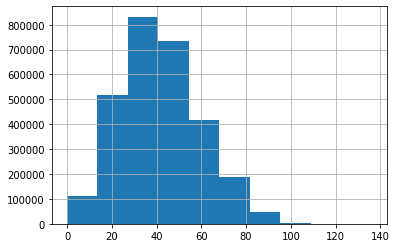

In [11]:
#A principio, os dados contendo as idades parece estar corretos
casos_.idade.hist()

<AxesSubplot:>

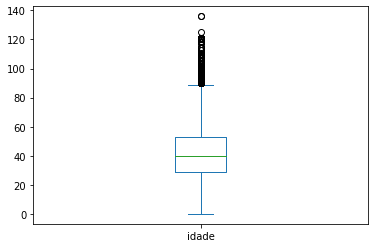

In [12]:
#Existem casos de pessoas com mais de 120 anos
casos_.idade.plot(kind='box')

<AxesSubplot:>

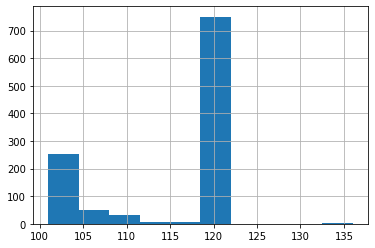

In [13]:
casos_.query("idade > 100").idade.hist()

In [14]:
#De acordo com o Guinness Book, a pessoa que mais viveu no mundo foi Jeanne Calment, que morreu com 122 anos de idade
# https://www.guinnessworldrecords.com.br/world-records/oldest-person
#Esses casos com mais de 
casos_.query("idade > 122")

nome_munic  codigo_ibge  idade    cs_sexo diagnostico_covid19  \
531285   Cravinhos      3513108  136.0   FEMININO          CONFIRMADO   
1410747    Taubaté      3554102  136.0  MASCULINO          CONFIRMADO   
2525908       Iepê      3519907  125.0  MASCULINO          CONFIRMADO   

        data_inicio_sintomas  obito      asma cardiopatia  diabetes  \
531285            2021-03-18      0  IGNORADO    IGNORADO  IGNORADO   
1410747           2020-03-19      0  IGNORADO    IGNORADO  IGNORADO   
2525908                 None      0  IGNORADO    IGNORADO  IGNORADO   

        doenca_hematologica doenca_hepatica doenca_neurologica doenca_renal  \
531285             IGNORADO        IGNORADO           IGNORADO     IGNORADO   
1410747            IGNORADO        IGNORADO           IGNORADO     IGNORADO   
2525908            IGNORADO        IGNORADO           IGNORADO     IGNORADO   

        imunodepressao obesidade outros_fatores_de_risco pneumopatia  \
531285        IGNORADO  IGNORADO                IGNORADO    IGNORADO   
1410747       IGNORADO  IGNORADO                IGNORADO    IGNORADO   
2525908       IGNORADO  IGNORADO                IGNORADO    IGNORADO   

         puerpera sindrome_de_down  
531285   IGNORADO         IGNORADO  
1410747  IGNORADO         IGNORADO  
2525908  IGNORADO         IGNORADO

In [15]:
casos_.idade = casos_.idade.apply(lambda x:np.nan if x > 122 else x)

<AxesSubplot:>

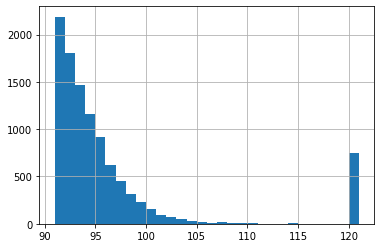

In [16]:
#Essa quantidade de pessoas com mais de 120 não segue a distribuição praticamente exponencial. Para esses casos, vamos deixar esses dados nulos
casos_.query("idade > 90").idade.hist(bins = 30)

In [17]:
# Ainda conforme o livro do Guinness, o homem mais velho vivo encontrado desde a oficialização dos recordes, tinha 116
# https://www.guinnessworldrecords.com.br/world-records/oldest-person-(male)
# Atualmente, a pessoa mais velha do mundo possui 117
# https://www.guinnessworldrecords.com.br/world-records/84549-oldest-person-living

#vamos remover os casos com mais de 117 anos
casos_.query("idade > 90").idade.value_counts().sort_index()

91.0     2189
92.0     1801
93.0     1466
94.0     1156
95.0      921
96.0      620
97.0      457
98.0      319
99.0      228
100.0     161
101.0      97
102.0      72
103.0      53
104.0      32
105.0      20
106.0      13
107.0      16
108.0      12
109.0       9
110.0      11
113.0       3
114.0       4
115.0       1
117.0       1
118.0       3
119.0       1
120.0     721
121.0      28
Name: idade, dtype: int64

In [18]:
casos_.idade = casos_.idade.apply(lambda x: np.nan if x >= 117 else x)

## cs_sexo

In [19]:
# Os casos indefinidos, ignorados e NA serão todos consideredados NA
casos_.cs_sexo.value_counts(dropna = False)

FEMININO      1524022
MASCULINO     1327492
INDEFINIDO       4683
IGNORADO           27
NA                  1
Name: cs_sexo, dtype: int64

In [20]:
casos_.cs_sexo = pd.Categorical(casos_.cs_sexo.str.lower(),categories=["masculino","feminino"])

In [21]:
casos_.cs_sexo.value_counts(dropna=False)

feminino     1524022
masculino    1327492
NaN             4711
Name: cs_sexo, dtype: int64

## diagnostico_covid19

In [22]:
casos_.diagnostico_covid19.value_counts(dropna=False)

CONFIRMADO    2856225
Name: diagnostico_covid19, dtype: int64

In [23]:
#Esse campo só possui uma unica informação, portanto vamos removê-lo
casos_ = casos_.drop(columns = "diagnostico_covid19")

## data_inicio_sintomas

In [24]:
#Trata-se de um campo de data. Vamos tentar converter para dados do tipo datetime
#Quantos valores não conseguimos converter para data?
pd.to_datetime(casos_.data_inicio_sintomas,errors='coerce').isna().sum()

34679

In [25]:
#Esse é o mesmo valor de dados faltantes descrito pela função describe. Vamos converter
casos_.data_inicio_sintomas = pd.to_datetime(casos_.data_inicio_sintomas,errors='coerce')

## obito

In [26]:
casos_.obito.value_counts()

0    2762383
1      93842
Name: obito, dtype: int64

# COMORBIDADES

In [27]:
comorbidades = ['asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
               'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
               'imunodepressao', 'obesidade', 'outros_fatores_de_risco', 'pneumopatia',
               'puerpera', 'sindrome_de_down']

In [28]:
#Verificando quais são todos os tipos de valores existentes nos campos com comorbidades. Todos eles possuem 3 valores unicos. Vamos ver se são iguais
pd.DataFrame({comor: casos_[comor].unique() for comor in comorbidades})

asma cardiopatia  diabetes doenca_hematologica doenca_hepatica  \
0  IGNORADO    IGNORADO  IGNORADO            IGNORADO        IGNORADO   
1       SIM         SIM       SIM                 NÃO             NÃO   
2       NÃO         NÃO       NÃO                 SIM             SIM   

  doenca_neurologica doenca_renal imunodepressao obesidade  \
0           IGNORADO     IGNORADO       IGNORADO  IGNORADO   
1                NÃO          NÃO            NÃO       SIM   
2                SIM          SIM            SIM       NÃO   

  outros_fatores_de_risco pneumopatia  puerpera sindrome_de_down  
0                IGNORADO    IGNORADO  IGNORADO         IGNORADO  
1                     NÃO         NÃO       NÃO              NÃO  
2                     SIM         SIM       SIM              SIM

In [29]:
resultado_comorbidade = ["ignorado","sim","não"]

In [30]:
#Transformando em dados categoricos
for comor in comorbidades:
    casos_[comor] = pd.Categorical(casos_[comor].str.lower(), categories= resultado_comorbidade)

In [31]:
# A grande maioria das comorbidades são ignoradas. Vamos criar uma campo para verificar se tudo foi ignorado
pd.DataFrame({comor: 100*casos_[comor].value_counts(normalize=True) for comor in comorbidades}).T

ignorado       sim       não
asma                     95.485755  0.308834  4.205411
cardiopatia              89.242549  8.842126  1.915325
diabetes                 91.439505  5.902161  2.658334
doenca_hematologica      95.555917  0.085357  4.358725
doenca_hepatica          95.571077  0.089979  4.338944
doenca_neurologica       95.440660  0.425387  4.133953
doenca_renal             95.242182  0.612697  4.145122
imunodepressao           95.049900  0.723647  4.226453
obesidade                95.407120  0.846502  3.746379
outros_fatores_de_risco  94.672654  2.882266  2.445080
pneumopatia              95.449308  0.374655  4.176037
puerpera                 95.606999  0.030810  4.362191
sindrome_de_down         95.569117  0.029970  4.400914

In [32]:
casos_["totalmente_ignorado"] = (casos_[comorbidades] == "ignorado").sum(axis=1) == len(comorbidades)

In [33]:
casos_.totalmente_ignorado.value_counts(normalize = True)

True     0.854799
False    0.145201
Name: totalmente_ignorado, dtype: float64

## ASMA

In [34]:
def plot_comorbidade(df,comorbidade,bins = [0,10,20,30,40,50,60,70,80,90,100,116],oqplotar = "casos",ignorado = True,nao=True,
                     xlabel = "Quantidade de Pessoas",global_title = ""):
    
    df_ = df.assign(idade_ = lambda x: pd.cut(x.idade,bins=bins,include_lowest=True)) \
                     .groupby(["idade_","cs_sexo",comorbidade]).agg({"obito":["count","sum"]}).reset_index() \
                     .assign(idade_ = lambda x: x["idade_"].apply(lambda y: "até %d" % y.right if y.left < 0 else 
                                                                           "%d a %d anos" % (y.left,y.right) )) \
                     .droplevel(level = 1,axis=1)
    df_.columns = ["Idade","Sexo",'status_comorbidade',"casos","obitos"]
    if(ignorado == False):
        df_ = df_.query("status_comorbidade != 'ignorado'")
    if(nao == False):
        df_ = df_.query("status_comorbidade != 'não'")
    
    df_ = df_.assign(legenda = lambda x: pd.Categorical(x.apply(lambda y: y["Sexo"] + " - " + y['status_comorbidade'],axis=1),
                                                        categories = ["feminino - ignorado",
                                                                      "feminino - sim",
                                                                      "feminino - não",
                                                                      "masculino - ignorado",
                                                                      "masculino - sim",
                                                                      "masculino - não"]))
    return (
                gg.ggplot()
                +gg.geom_col(data = df_.query("Sexo == 'feminino'"), 
                             mapping=gg.aes(y = "np.where(Sexo == 'feminino',-%s,%s)" % (oqplotar,oqplotar),x = "Idade",
                                            fill = "legenda"))
                +gg.geom_col(data = df_.query("Sexo == 'masculino'"), 
                             mapping=gg.aes(y = "np.where(Sexo == 'feminino',-%s,%s)" % (oqplotar,oqplotar),x = "Idade",
                                            fill = "legenda"))
                +gg.coord_flip()
                +gg.labs(y = xlabel)
                +gg.scale_y_continuous(labels = np.abs)
                +gg.scale_fill_manual(values=["bisque","C1","gold","lightblue","C0","cyan"])
                +gg.theme(panel_background=gg.element_blank())
                +gg.ggtitle(global_title)
    )

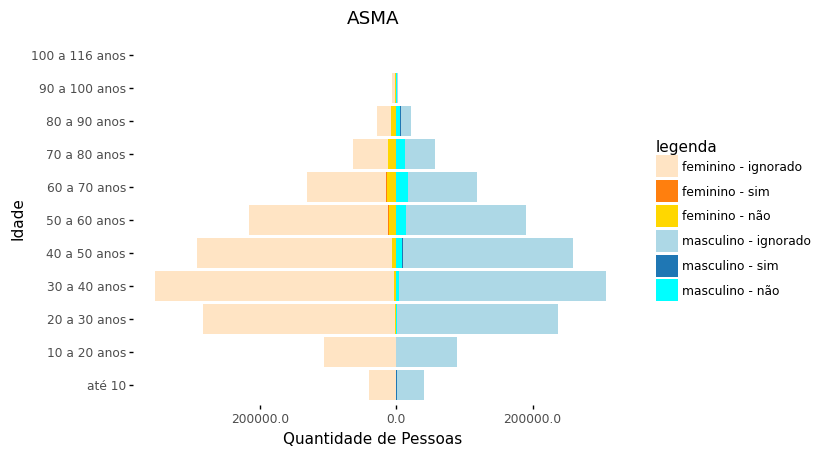

<ggplot: (-9223371932905542484)>

In [35]:
plot_comorbidade(casos_,"asma",global_title="ASMA")

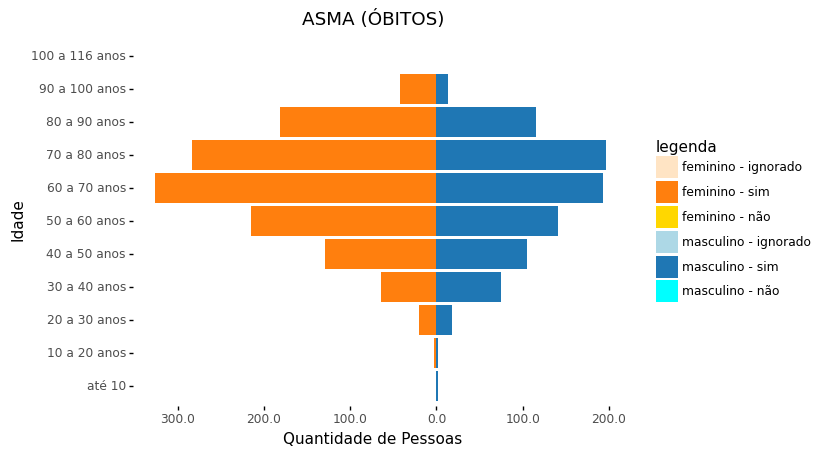

<ggplot: (-9223371933156244600)>

In [36]:
plot_comorbidade(casos_,"asma",global_title="ASMA (ÓBITOS)",oqplotar="obitos",ignorado=False,nao=False)

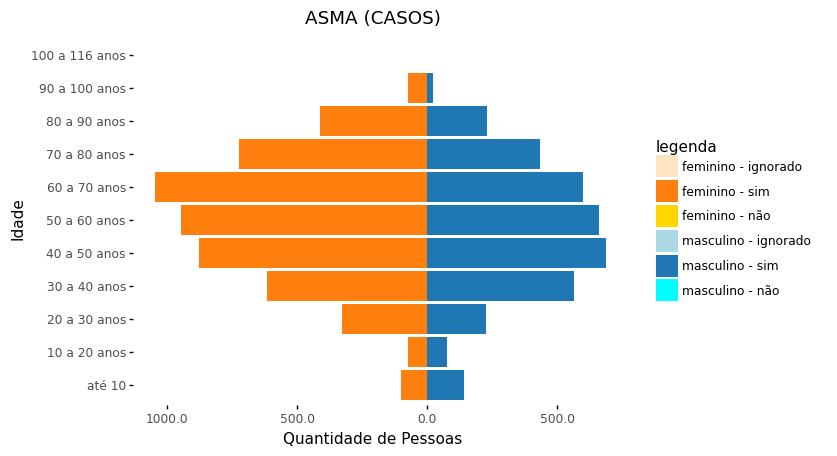

<ggplot: (-9223371933156010720)>

In [37]:
plot_comorbidade(casos_,"asma",global_title="ASMA (CASOS)",ignorado=False,nao=False)

## CARDIOPATIA

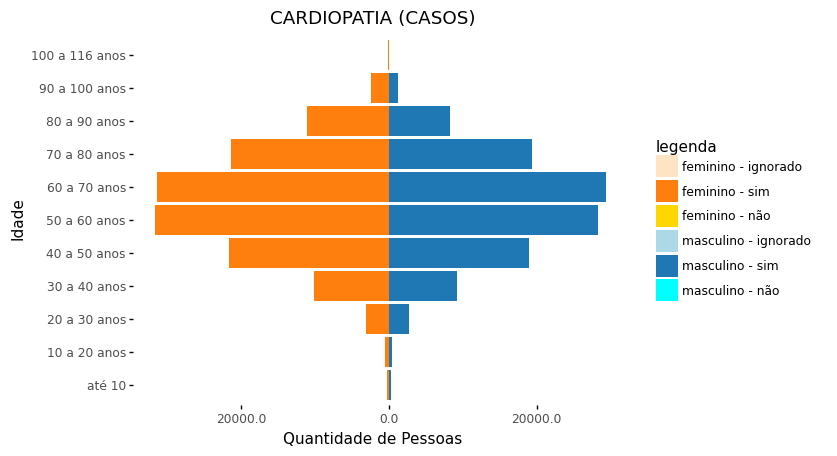

<ggplot: (-9223371932905536576)>

In [38]:
plot_comorbidade(casos_,"cardiopatia",global_title="CARDIOPATIA (CASOS)",ignorado=False,nao=False)

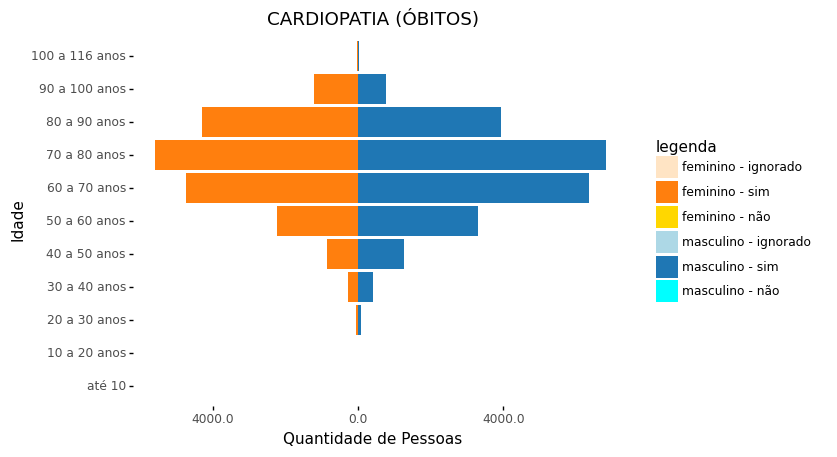

<ggplot: (-9223371933156141836)>

In [39]:
plot_comorbidade(casos_,"cardiopatia",global_title="CARDIOPATIA (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

## DIABETES

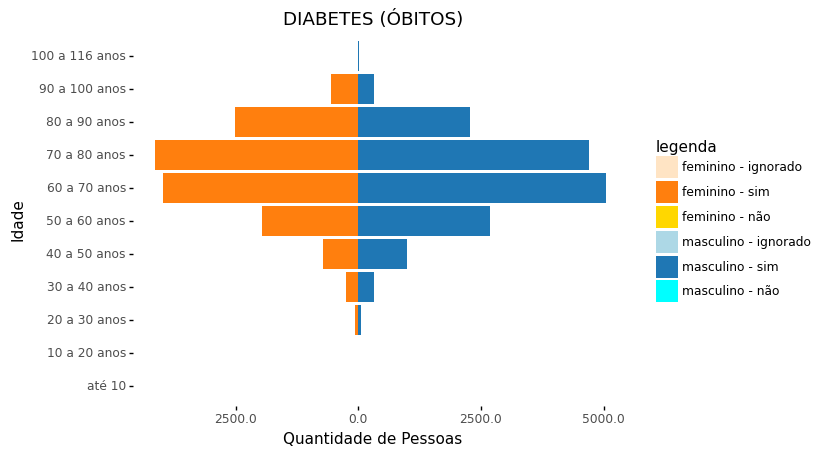

<ggplot: (-9223371933158914144)>

In [40]:
plot_comorbidade(casos_,"diabetes",global_title="DIABETES (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

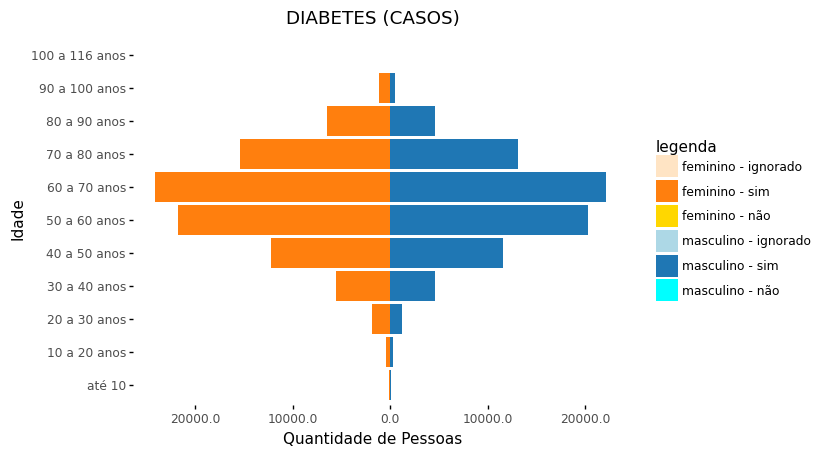

<ggplot: (-9223371933157818324)>

In [41]:
plot_comorbidade(casos_,"diabetes",global_title="DIABETES (CASOS)",ignorado=False,nao=False,oqplotar="casos")

## DOENÇA HEMATOLÓGICA

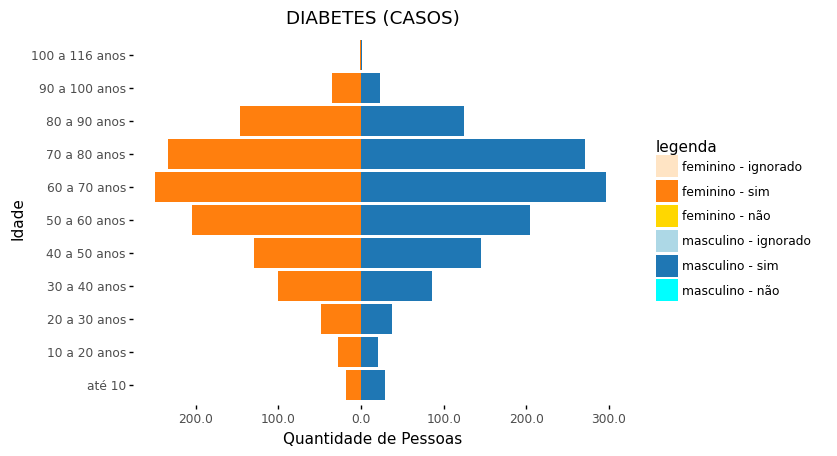

<ggplot: (-9223371933157385264)>

In [42]:
plot_comorbidade(casos_,"doenca_hematologica",global_title="DIABETES (CASOS)",ignorado=False,nao=False,oqplotar="casos")

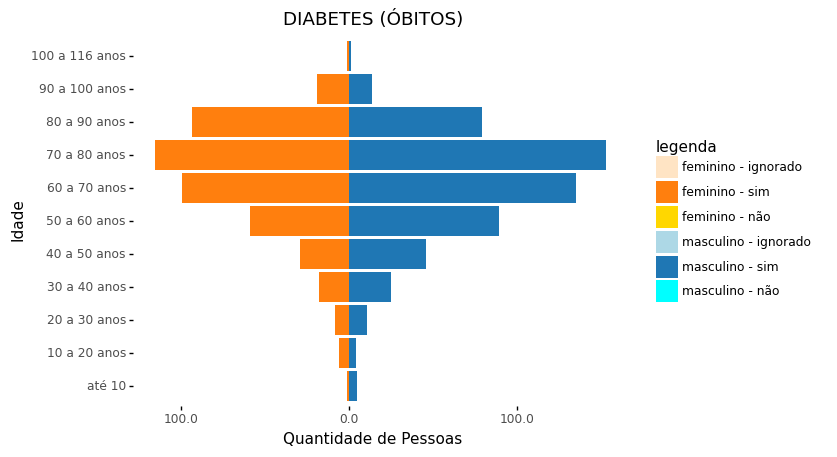

<ggplot: (-9223371933157811720)>

In [43]:
plot_comorbidade(casos_,"doenca_hematologica",global_title="DIABETES (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

## DOENÇA HEPÁTICA

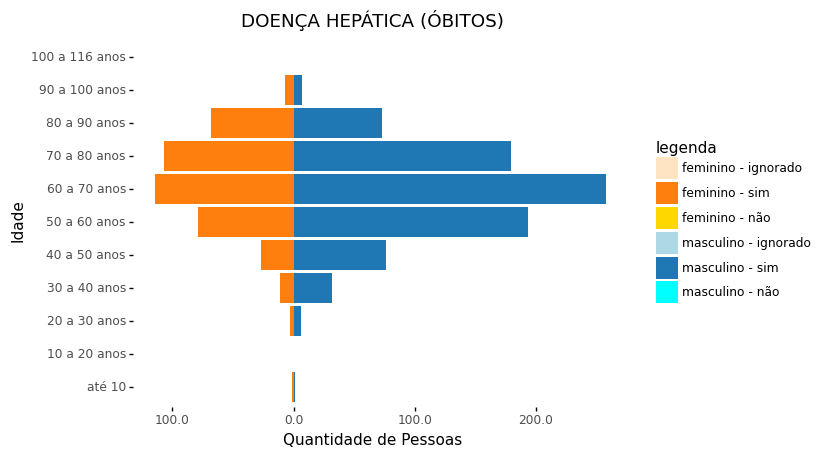

<ggplot: (-9223371933157254620)>

In [44]:
plot_comorbidade(casos_,"doenca_hepatica",global_title="DOENÇA HEPÁTICA (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

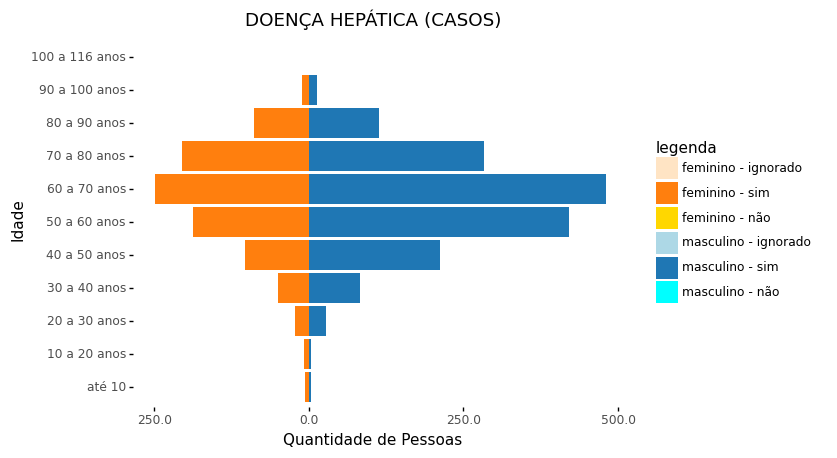

<ggplot: (-9223371933157205936)>

In [45]:
plot_comorbidade(casos_,"doenca_hepatica",global_title="DOENÇA HEPÁTICA (CASOS)",ignorado=False,nao=False,oqplotar="casos")

## DOENÇA NEUROLÓGICA

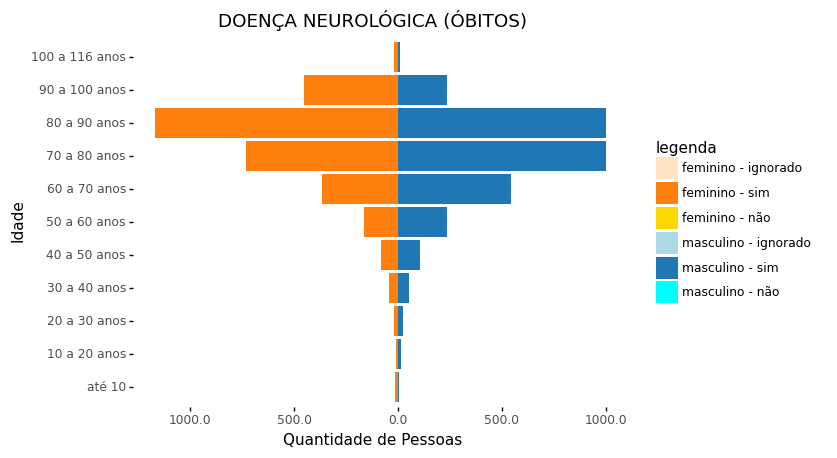

<ggplot: (-9223371933148395744)>

In [46]:
plot_comorbidade(casos_,"doenca_neurologica",global_title="DOENÇA NEUROLÓGICA (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

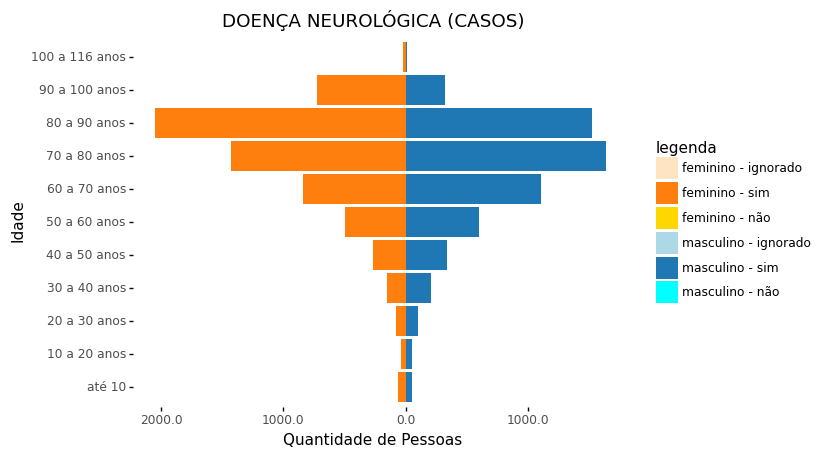

<ggplot: (-9223371933148385564)>

In [47]:
plot_comorbidade(casos_,"doenca_neurologica",global_title="DOENÇA NEUROLÓGICA (CASOS)",
                     ignorado=False,nao=False,oqplotar="casos")

## DOENÇA RENAL

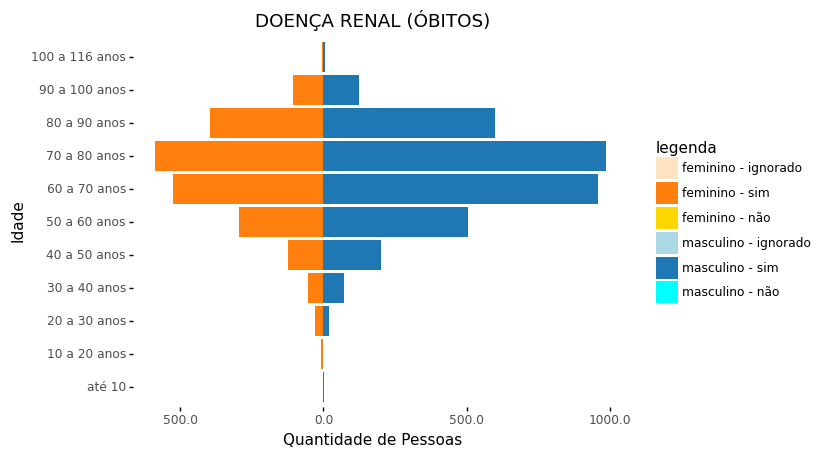

<ggplot: (-9223371933148335448)>

In [48]:
plot_comorbidade(casos_,"doenca_renal",global_title="DOENÇA RENAL (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

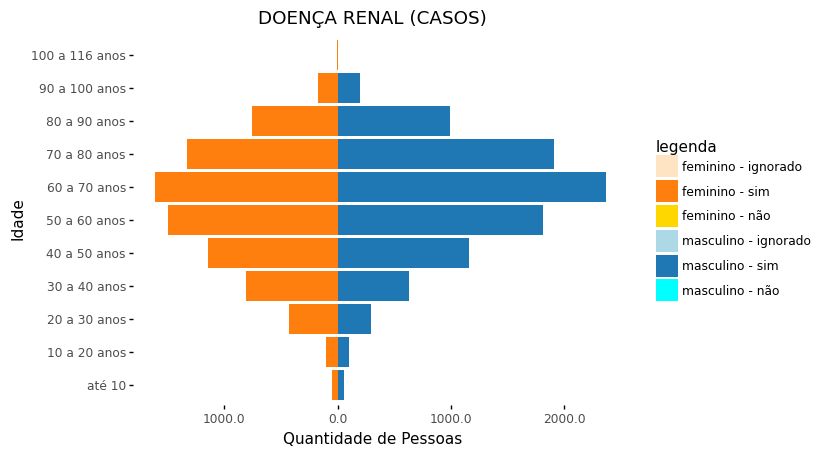

<ggplot: (-9223371933157823284)>

In [49]:
plot_comorbidade(casos_,"doenca_renal",global_title="DOENÇA RENAL (CASOS)",
                 ignorado=False,nao=False,oqplotar="casos")

## IMUNODEPRESSÃO

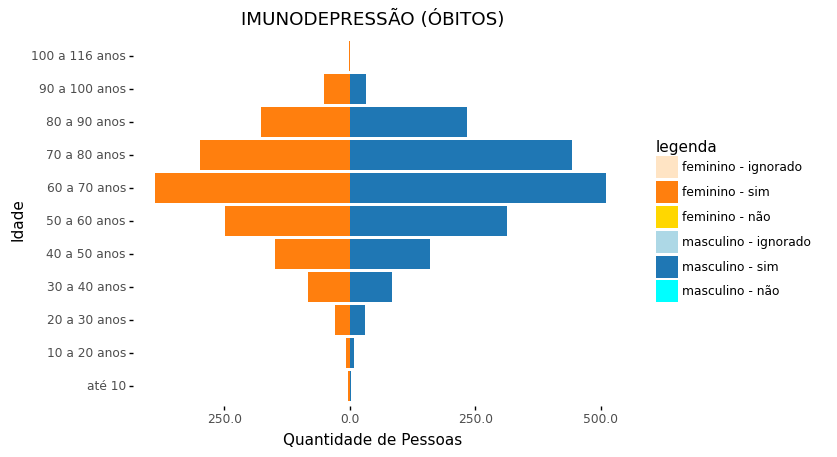

<ggplot: (-9223371933032769120)>

In [50]:
plot_comorbidade(casos_,"imunodepressao",global_title="IMUNODEPRESSÃO (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

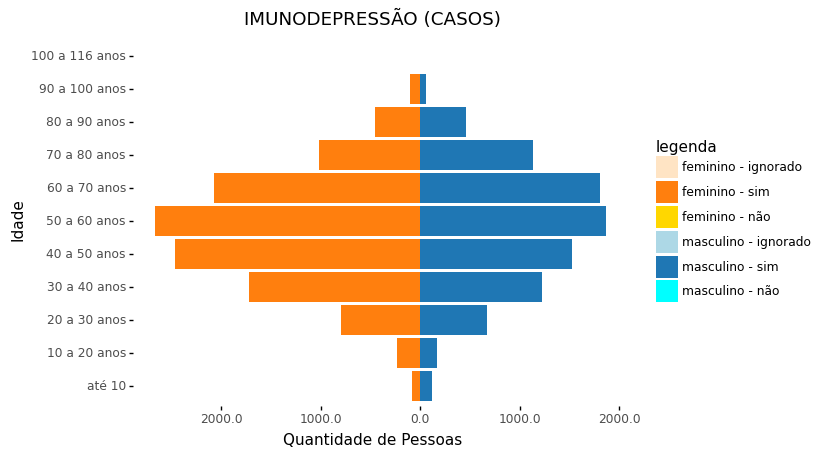

<ggplot: (-9223371933158908816)>

In [51]:
plot_comorbidade(casos_,"imunodepressao",global_title="IMUNODEPRESSÃO (CASOS)",
                 ignorado=False,nao=False,oqplotar="casos")

## OBESIDADE

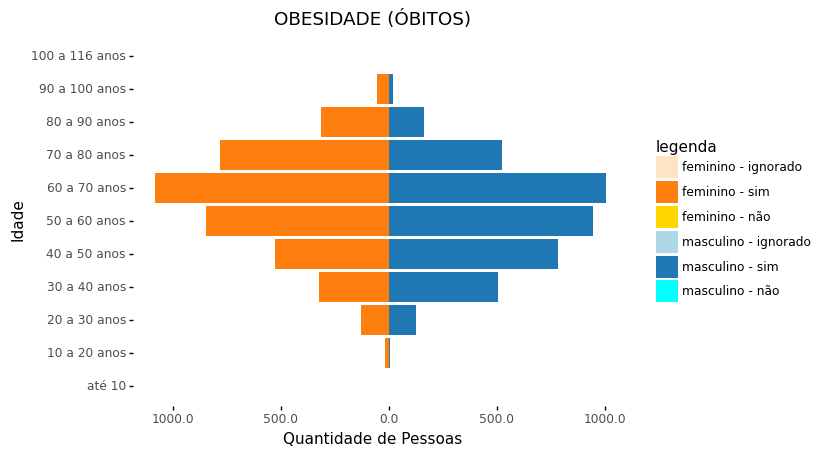

<ggplot: (-9223371933032234876)>

In [52]:
plot_comorbidade(casos_,"obesidade",global_title="OBESIDADE (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

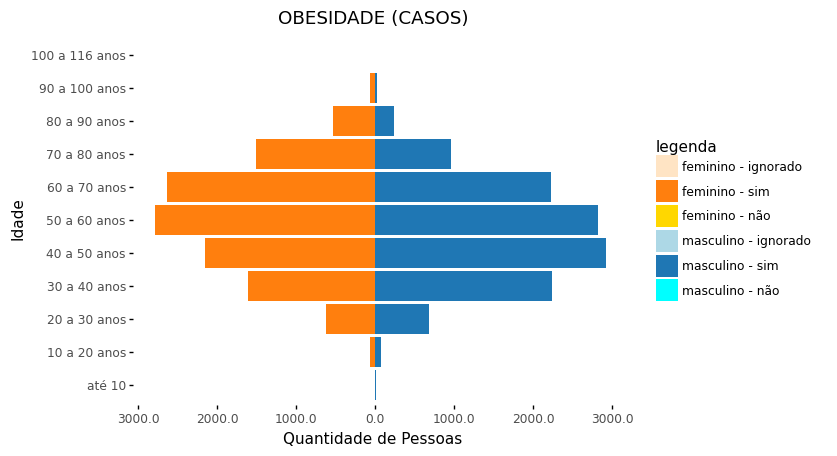

<ggplot: (-9223371933158838540)>

In [53]:
plot_comorbidade(casos_,"obesidade",global_title="OBESIDADE (CASOS)",
                 ignorado=False,nao=False,oqplotar="casos")

## OUTROS FATORES DE RISCO

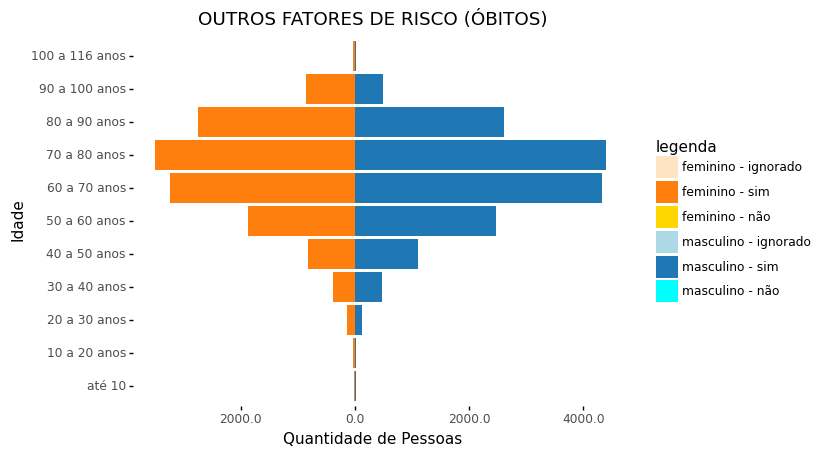

<ggplot: (-9223371933158779676)>

In [56]:
plot_comorbidade(casos_,"outros_fatores_de_risco",global_title="OUTROS FATORES DE RISCO (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

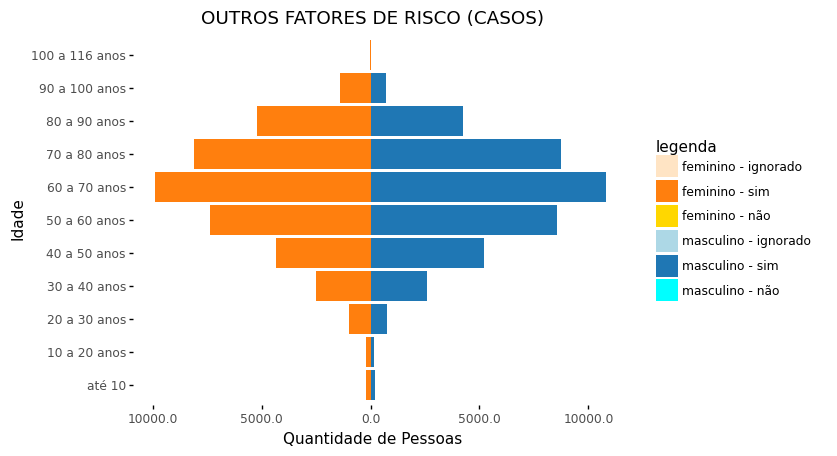

<ggplot: (-9223371933141941116)>

In [57]:
plot_comorbidade(casos_,"outros_fatores_de_risco",global_title="OUTROS FATORES DE RISCO (CASOS)",
                 ignorado=False,nao=False,oqplotar="casos")

## PNEUMOPATIA

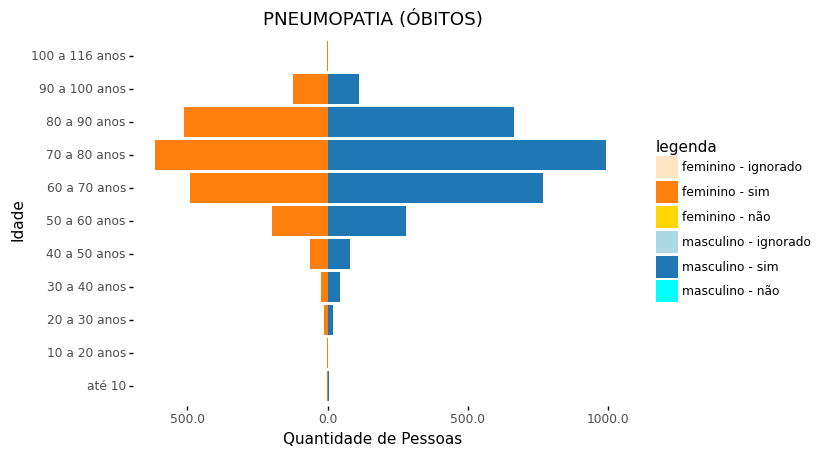

<ggplot: (-9223371933141983140)>

In [58]:
plot_comorbidade(casos_,"pneumopatia",global_title="PNEUMOPATIA (ÓBITOS)",
                 ignorado=False,nao=False,oqplotar="obitos")

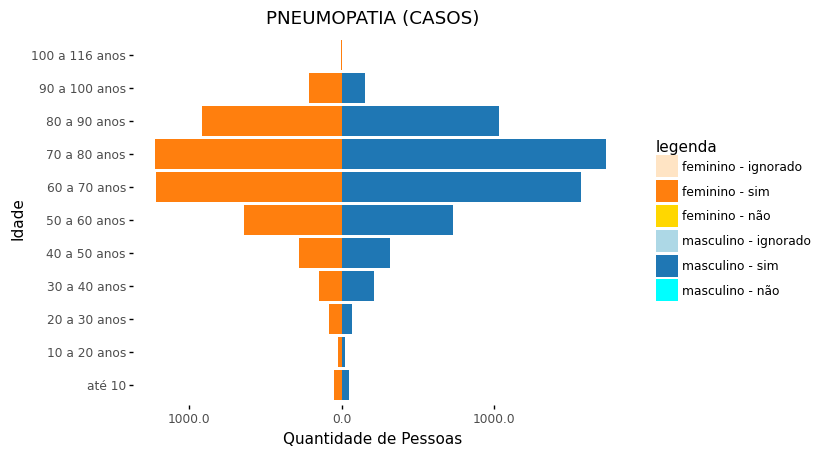

<ggplot: (-9223371933158827980)>

In [59]:
plot_comorbidade(casos_,"pneumopatia",global_title="PNEUMOPATIA (CASOS)",
                 ignorado=False,nao=False,oqplotar="casos")

## PUÉRPERA

Nota-se que temos casos de homens que foram classificados com estado de puérpera.

__Vamos alterar esses valores e ignorar os casos de homens com puérpera__

Além disso, existem alguns casos de mulheres, acima de 55 anos, estão em estado de puérpera, sendo que, conforme dados da Organização Mundial da Saúde, as mulheres tem sua última menstruação em torno dos 45 a 55 anos<br>
__Portanto, vamos ignorar os casos considerados com puérpera acima de 55 anos__

Fonte: https://www.scielo.br/j/sausoc/a/WJgGfLxdL9rWM5jsQpWSYbv/?lang=pt#:~:text=A%20OMS%20considera%20que%20uma,os%2045%20e%2055%20anos

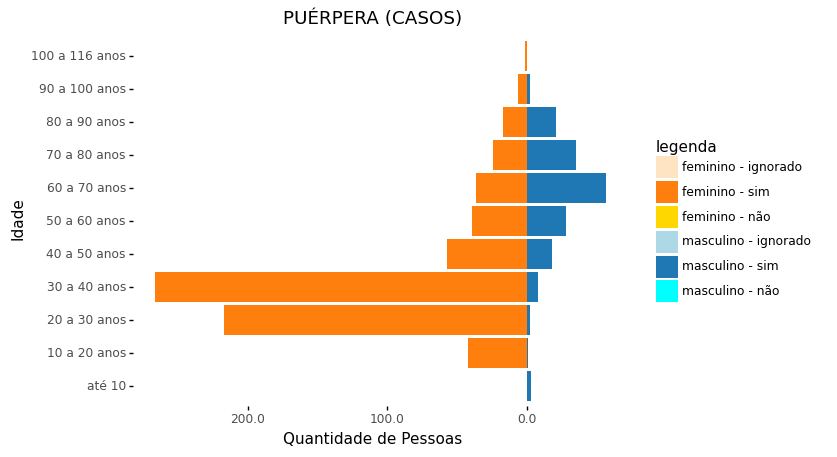

<ggplot: (-9223371933141403700)>

In [60]:
plot_comorbidade(casos_,"puerpera",global_title="PUÉRPERA (CASOS)",ignorado=False,nao=False,oqplotar="casos")

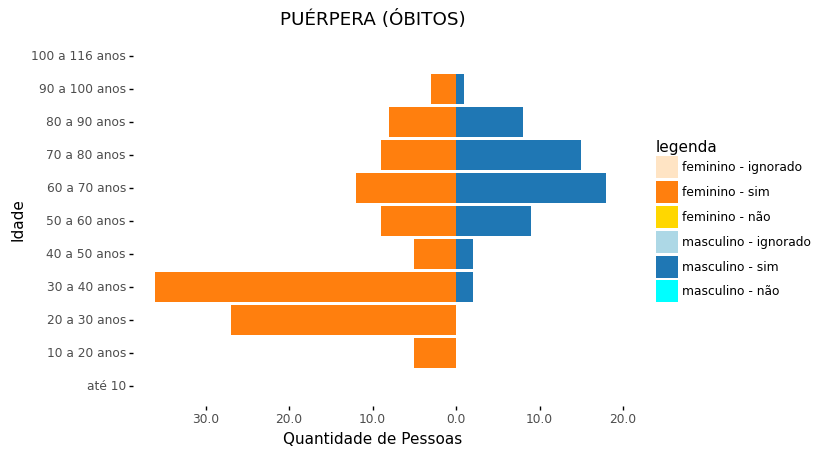

<ggplot: (-9223371933141356616)>

In [61]:
plot_comorbidade(casos_,"puerpera",global_title="PUÉRPERA (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

In [62]:
mascara = casos_.query("puerpera == 'sim' & (cs_sexo == 'masculino' | (cs_sexo == 'feminino' & idade > 55))").index
casos_.loc[mascara,'puerpera'] = "ignorado"

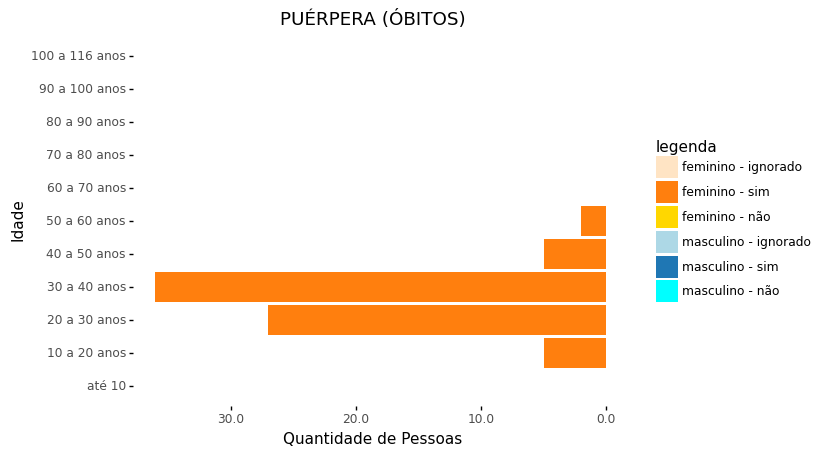

<ggplot: (-9223371933140925428)>

In [63]:
plot_comorbidade(casos_,"puerpera",global_title="PUÉRPERA (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

## SÍNDROME DE DOWN

De acordo com uma reportagem de 2018 do G1, a pessoa mais velha portadora da Síndrome de Down possuia 70 anos
Considerando que a pessoa ainda esteja viva, ela teria algo em torno de 73 anos, portanto, __vamos considerar as pessoas acima dessa idade sem a síndrome__ 

Fonte: https://g1.globo.com/go/goias/noticia/2018/10/18/goiano-de-70-anos-entra-para-o-livro-dos-recordes-como-o-idoso-com-sindrome-de-down-mais-velho-do-brasil.ghtml

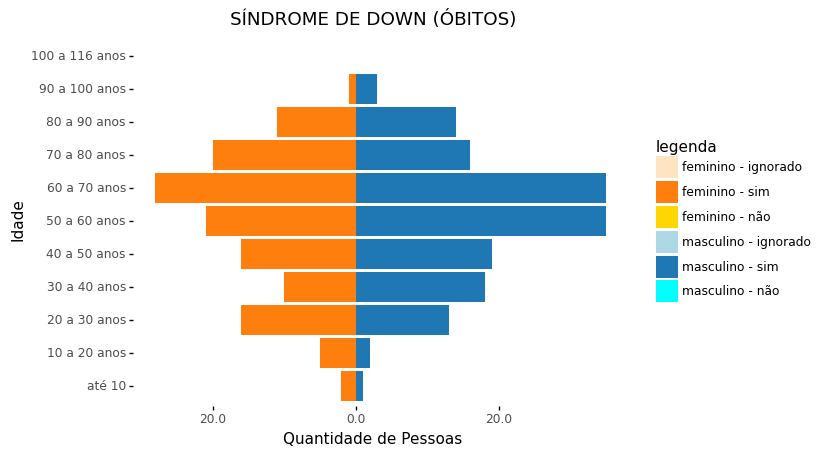

<ggplot: (-9223371895355154460)>

In [86]:
plot_comorbidade(casos_,"sindrome_de_down",global_title="SÍNDROME DE DOWN (ÓBITOS)",ignorado=False,nao=False,oqplotar="obitos")

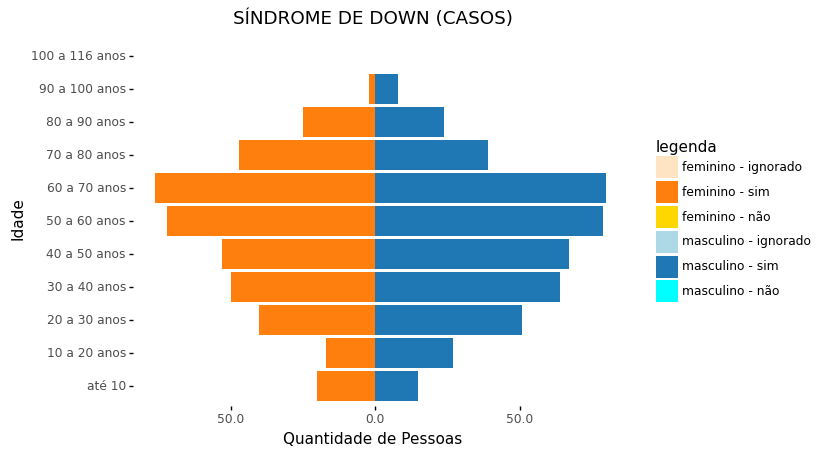

<ggplot: (-9223371895352999064)>

In [87]:
plot_comorbidade(casos_,"sindrome_de_down",global_title="SÍNDROME DE DOWN (CASOS)",ignorado=False,nao=False,oqplotar="casos")

In [73]:
mascara = casos_.query("sindrome_de_down == 'sim' & idade > 73").index
casos_.loc[mascara,"sindrome_de_down"] = "ignorado"

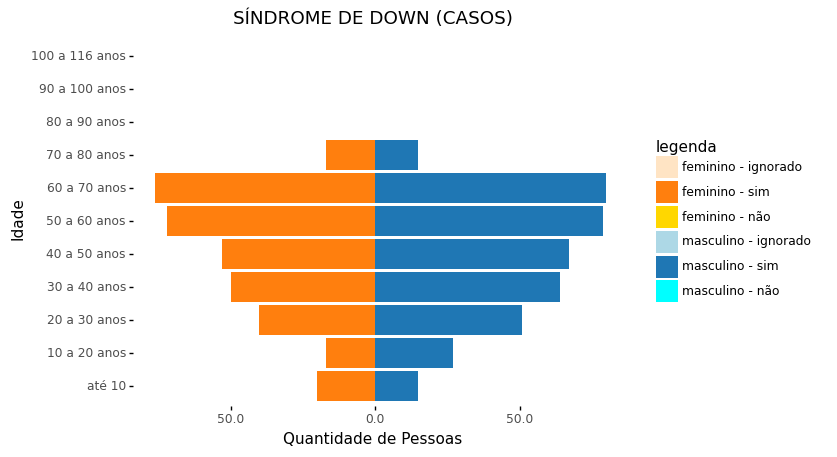

<ggplot: (-9223371933141962648)>

In [77]:
plot_comorbidade(casos_,"sindrome_de_down",global_title="SÍNDROME DE DOWN (CASOS)",ignorado=False,nao=False,oqplotar="casos")

# Salvando arquivo final

In [78]:
describe(casos_)

Quantidade de linhas: 2856225


variable            type     na na_pct  unique  \
0                nome_munic          object    571  0.02%     645   
1               codigo_ibge           int64      0   0.0%     646   
2                     idade         float64   7074  0.25%     114   
3                   cs_sexo        category   4711  0.16%       2   
4      data_inicio_sintomas  datetime64[ns]  34679  1.21%     448   
5                     obito           int64      0   0.0%       2   
6                      asma        category      0   0.0%       3   
7               cardiopatia        category      0   0.0%       3   
8                  diabetes        category      0   0.0%       3   
9       doenca_hematologica        category      0   0.0%       3   
10          doenca_hepatica        category      0   0.0%       3   
11       doenca_neurologica        category      0   0.0%       3   
12             doenca_renal        category      0   0.0%       3   
13           imunodepressao        category      0   0.0%       3   
14                obesidade        category      0   0.0%       3   
15  outros_fatores_de_risco        category      0   0.0%       3   
16              pneumopatia        category      0   0.0%       3   
17                 puerpera        category      0   0.0%       3   
18         sindrome_de_down        category      0   0.0%       3   
19      totalmente_ignorado            bool      0   0.0%       2   

                    min               quat25               median  \
0                     -                    -                    -   
1               3500105            3519071.0            3543402.0   
2                   0.0                 29.0                 40.0   
3                     -                    -                    -   
4   2020-02-04 00:00:00  2020-08-01 00:00:00  2020-12-06 00:00:00   
5                     0                  0.0                  0.0   
6                     -                    -                    -   
7                     -                    -                    -   
8                     -                    -                    -   
9                     -                    -                    -   
10                    -                    -                    -   
11                    -                    -                    -   
12                    -                    -                    -   
13                    -                    -                    -   
14                    -                    -                    -   
15                    -                    -                    -   
16                    -                    -                    -   
17                    -                    -                    -   
18                    -                    -                    -   
19                False                  1.0                  1.0   

                             mean               quat75                  max  \
0                               -                    -                    -   
1                    3535240.9102            3550308.0              3599999   
2                       41.576425                 53.0                115.0   
3                               -                    -                    -   
4   2020-11-11 12:26:32.961589504  2021-02-21 00:00:00  2021-04-26 00:00:00   
5                        0.032855                  0.0                    1   
6                               -                    -                    -   
7                               -                    -                    -   
8                               -                    -                    -   
9                               -                    -                    -   
10                              -                    -                    -   
11                              -                    -                    -   
12                              -                    -                    -   
13           

In [79]:
write_table_from_pandas(casos_,"../data/interim/casos_obitos_doencas_preexistentes.parquet")